# Exemple 2: classification k-plus proches voisins avec scikit-learn

scikit-learn est livré avec des données pour s'exercer.
Ici nous utilisons "digits", composé de 1797 images 8x8 pixels (dimension 64).



In [2]:
# Initialisations
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier

## Chargement et affichage des données

In [3]:
# Les données: chiffres
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target
print('Données chargées, dimensions ', digits.data.shape)
# affiche les classes et le nombre d'exemples dans chacune
print('Classes: ', np.unique(Y, return_counts=True)) 

Données chargées, dimensions  (1797, 64)
Classes:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))


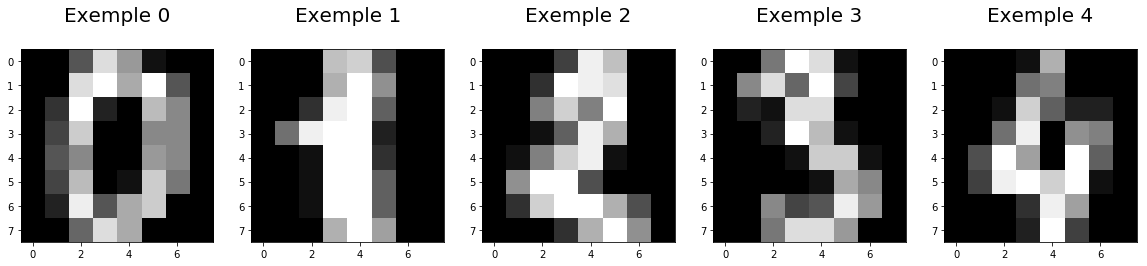

In [4]:
# Affichage de quelques exemples:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Exemple %i\n' % label, fontsize = 20)

### Séparation des données en ensembles d'apprentissage et de test 

 * `(X_train, Y_train)` : données utilisées pour estimer les paramètres (apprendre)
 * `(X_test, Y_test)`: données utilisées pour tester les performances

In [5]:
# 

test_size = 0.25 # proportion d'exemples utilisés pour le test
i = int(X.shape[0] * (1-test_size))

X_train = X[:i]
Y_train = Y[:i]
X_test = X[i:]
Y_test = Y[i:]
print( i, 'exemples en apprentissage et', len(Y_test), 'en test.')

# Ici on prend juste le début, la fonction sklearn.model_selection.train_test_split
# est plus intéressante (on la verra plus tard)


1347 exemples en apprentissage et 450 en test.


In [6]:
# Le modèle:
K = 3

model = KNeighborsClassifier(n_neighbors=K)

# Apprentissage:
model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [7]:
# Test du modèle
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

print('10 premiers exemples de test:')
print('Classes vraies :', Y_test[:12])
print('Classes prévues:', Y_test_pred[:12])

# Calcul du taux d'erreur
from sklearn import metrics
print("Précision:",metrics.accuracy_score(Y_test, Y_test_pred))

10 premiers exemples de test:
Classes vraies : [3 7 3 3 4 6 6 6 4 9 1 5]
Classes prévues: [3 7 3 3 4 6 6 6 4 9 1 5]
Précision: 0.9711111111111111


In [8]:
errors = np.where( Y_test != Y_test_pred )[0]
print('Erreurs sur l\'ensemble de test:', errors)
nb_err = len(errors)
accuracy = (len(Y_test) - nb_err)/len(Y_test)
print('Nombre d\'erreurs:', nb_err, 'Précision', 100*accuracy, '%')

Erreurs sur l'ensemble de test: [ 14 206 235 258 259 264 281 311 313 315 380 418 443]
Nombre d'erreurs: 13 Précision 97.11111111111111 %


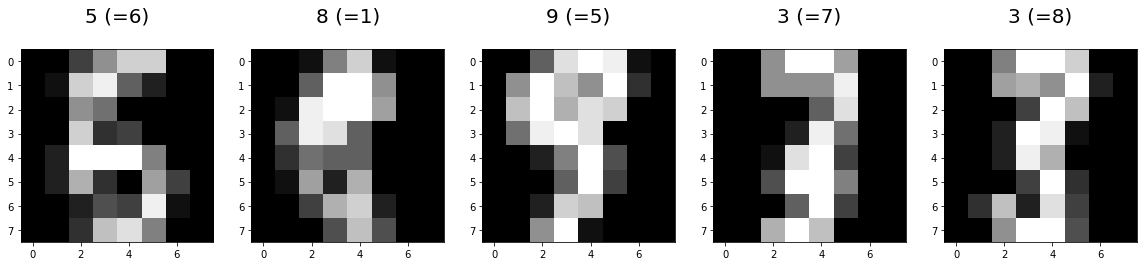

In [9]:
# Affiche les 5 premières erreurs:
plt.figure(figsize=(20,4))
i = 1
for index in errors[:5]:
    img = X_test[index]
    label = Y_test[index]
    plt.subplot(1, 5, i)
    plt.imshow(np.reshape(img, (8,8)), cmap=plt.cm.gray)
    plt.title('%d (=%d)\n' % (label, Y_test_pred[index]), fontsize = 20)
    i += 1

In [10]:
# Erreur en fonction de k
error_rates = []
for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_test_pred = model.predict(X_test)
    nb_err = len(np.where( Y_test != Y_test_pred )[0])
    err_rate = 100*nb_err / len(Y_test_pred)
    error_rates.append(err_rate)
    print('k=', k, 'err=%3.2g%%'% err_rate)


k= 1 err=3.8%
k= 2 err=3.8%
k= 3 err=2.9%
k= 4 err=3.1%
k= 5 err=3.6%
k= 6 err=4.2%
k= 7 err=4.4%
k= 8 err=4.4%
k= 9 err=4.4%
k= 10 err=4.4%
k= 11 err=4.2%
k= 12 err=4.2%
k= 13 err=4.7%
k= 14 err=  4%
k= 15 err=4.4%
k= 16 err=4.2%
k= 17 err=4.7%
k= 18 err=4.2%
k= 19 err=4.2%
k= 20 err=4.2%
k= 21 err=4.4%
k= 22 err=4.9%
k= 23 err=4.9%
k= 24 err=4.9%
k= 25 err=5.1%
k= 26 err=4.9%
k= 27 err=4.9%
k= 28 err=5.3%
k= 29 err=5.6%


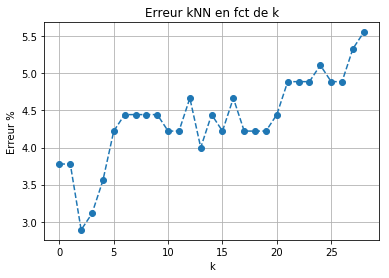

In [11]:
plt.plot(error_rates, 'o--')
plt.title('Erreur kNN en fct de k')
plt.xlabel('k')
plt.ylabel('Erreur %')
plt.grid(True)
#plt.savefig('kNN-exemple-fct.pdf')
plt.show()